In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a stock 
# in this case Apple Inc. using the price action from the past 60 days

In [ ]:
#Import the libraries

import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get a dataframe (df) with the stock price from a start to end date from yahoo finance 

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-06')

#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001
2020-12-31,134.740005,131.720001,134.080002,132.690002,98990400.0,132.690002
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.410004


In [ ]:
#Get the number of rows and columns in our data set
df.shape

(2268, 6)

<function matplotlib.pyplot.show>

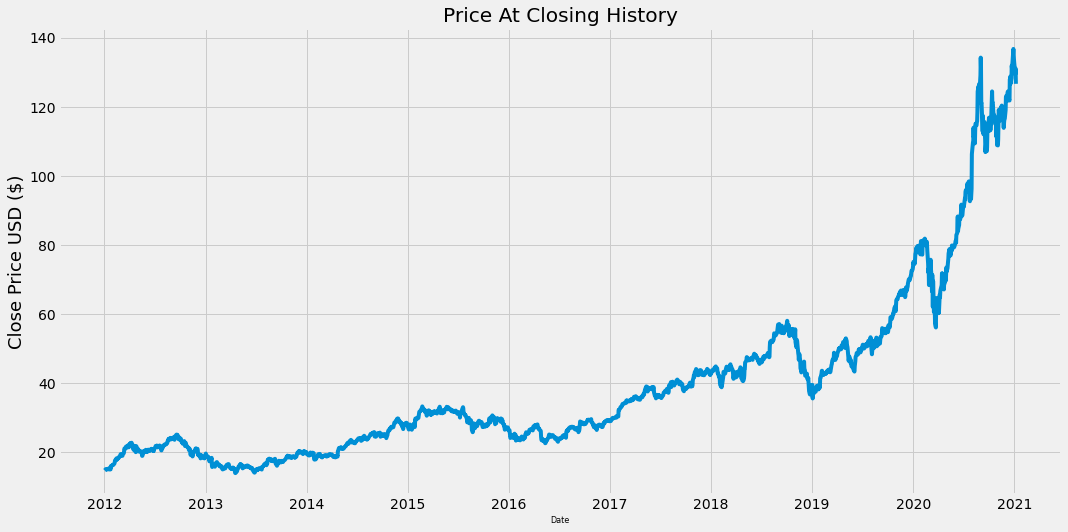

In [ ]:
#Visualize the closing price history for the stock in the form of a chart

#This is a plot with a figure size of 16x8
plt.figure(figsize=(16,8))

#This is the title of our plot
plt.title('Price At Closing History')

#We give our plot some closing data
plt.plot(df['Close'])

#This is the x-axis label
plt.xlabel('Date', fontsize= 8)

#This is the y-axis label
plt.ylabel('Close Price USD ($)', fontsize=18)

#Show the plot
plt.show



In [ ]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows of the dataset to train the model on (80% in our case) and round up
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1815

In [ ]:
#Scale the data, this is good practice before presenting to a neural network, as well as helps the model 
scaler = MinMaxScaler(feature_range=(0,1))

#Computes the min and max values to be used for scaling and transforms the data based on the values
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.00666611],
       [0.00800165],
       ...,
       [0.94068885],
       [0.9537242 ],
       [0.91779535]])

In [ ]:
#Create the training data set

#Create the scaled trainig data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

#Append the past 60 values to the x_train data set
for i in range(60, len(train_data)):

  #Contains 60 values from position 0 to position 59
  x_train.append(train_data[i-60:i, 0])

  #Contains the 61st value at position 60
  y_train.append(train_data[i, 0])

  if i<= 60:
    print(x_train)
    print(y_train)



[array([0.00602306, 0.00666611, 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851958, 0.00994242,
       0.01122559, 0.01082987, 0.00866215, 0.01073094, 0.00869416,
       0.0163321 , 0.01574143, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117443, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420113,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.04407018, 0.04499548, 0.04698279, 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.06268348, 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]


In [ ]:
#Convert the x_train and y_train to numpy arrays so we can use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data to 3-dimensional because that is what the LSTM model expects
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1755, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()

#Add a layer to our model, with 50 neurons, return sequence true because we're going to use another layer, with an input shape with the number of time steps and features
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

#Add another layer
model.add(LSTM(50, return_sequences=False))

#Add a dense layer with 25 neurons
model.add(Dense(25))

#Add another dense layer with 1 neuron
model.add(Dense(1)) 

In [ ]:
#Compile the model, the optimizer is used to improve the loss function and the loss function measures how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model, we give it the training data sets, batch size is the total number of training examples present in a batch, 
#epoch is the number of iterations when a data set is passed forward and backward through a neural network
model.fit(x_train, y_train, batch_size=1, epochs=1)

1755/1755 [==============================] - 45s 24ms/step - loss: 7.4285e-04


In [ ]:
#Create the testing data set

#Create a new array containing the scaled values from index 1755 to 2269 and then get all of the columns
test_data = scaled_data[training_data_len - 60: 2268, :]

#Create the data set x_test and y_set
x_test = []
y_test = dataset[training_data_len:, :]

#Create x_test set, that contains the past 60 values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data to 3 dimensions
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)

#Inverse transform the data in the x_test to make it the same as the y_test and basically unscale the values
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE) which is used to measure of the differences between values predicted by a model or an estimator and the values observed.
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


3.754456543238221

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


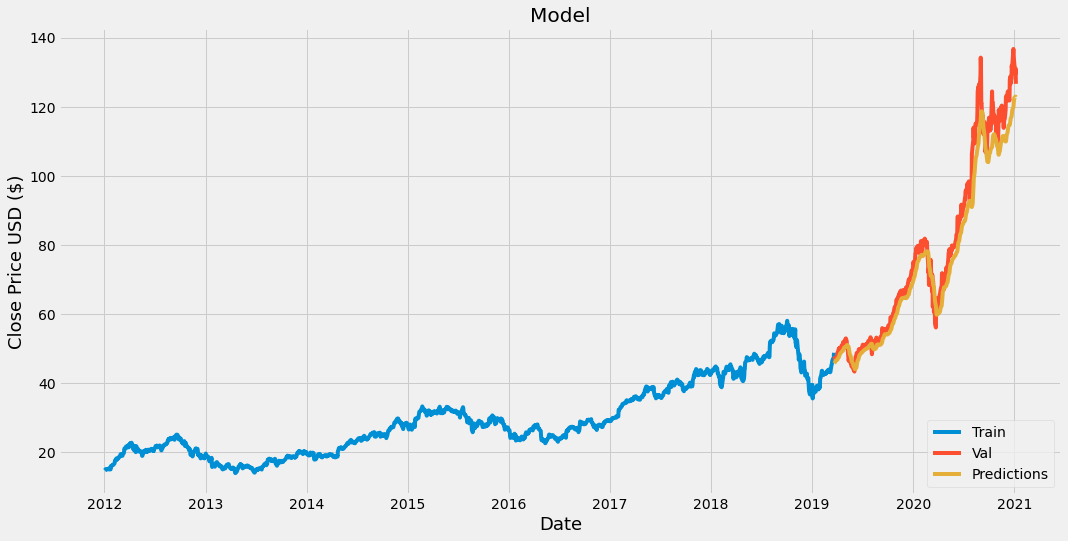

In [ ]:
#Plot the data on the graph

#Contains data from index 0 all the way to the training data length
train = data[:training_data_len]

#Contains data from the the training data length to the end of the data set
valid = data[training_data_len:]

#Give valid another column
valid['Predictions'] = predictions

#Visualize the data

#Give the plot a figure size of 16*8
plt.figure(figsize=(16,8))

#Give the plot a title
plt.title('Model')

#Give the x axis a label
plt.xlabel('Date', fontsize =18)

#Give the y axis a label
plt.ylabel('Close Price USD ($)', fontsize=18)

#Give the plot some data
plt.plot(train['Close'])

#Give it the actual price and the predicted price
plt.plot(valid[['Close', 'Predictions']])

#Give the plot a legend in the lower right location
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [ ]:
#Show the valid price and predicted prices
valid

,Close,Predictions
Date,,
2019-03-22,47.762501,45.703110
2019-03-25,47.185001,46.078358
2019-03-26,46.697498,46.339729
2019-03-27,47.117500,46.472439
2019-03-28,47.180000,46.553455
...,...,...
2020-12-30,133.720001,121.758858
2020-12-31,132.690002,122.469582
2021-01-04,129.410004,122.905327


In [ ]:
#We are going to get the predicted quote

#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-1-06')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create and empty list
X_test = []

#Append the past 60 days to the list
X_test.append(last_60_days_scaled)

#Convert the X_test dara to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[122.18918]]


In [ ]:
#Get the actual quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-01-07', end='2021-1-07')
print(apple_quote2['Close'])

Date
2021-01-07    130.919998
2021-01-07    130.919998
Name: Close, dtype: float64
